[[-51.44353353 -40.26270644 195.96724507  62.37712308  31.6227766 ]]


<IPython.core.display.Javascript object>


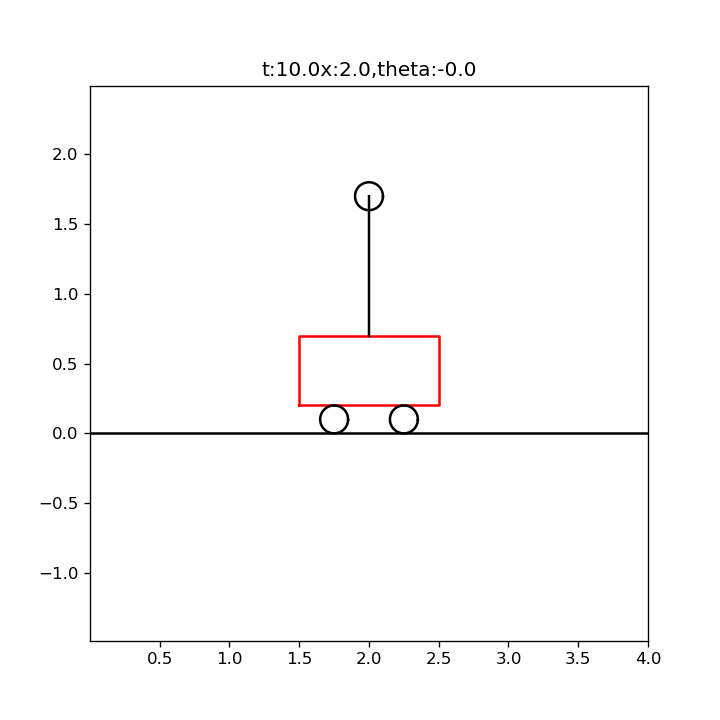

In [12]:
#%matplotlib notebook
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
#import math
#import time
import kal_python as kal


l_bar = 1.0  # length of bar
M = 1.0  # [kg]
m = 0.3  # [kg]
g = 9.8  # [m/s^2]

Q = np.diag([1, 0.01, 1.0, 0.01])
R = np.diag([0.01])
QQ = np.diag([1, 1, 1, 1,10])
RR = np.diag([0.01])
nx = 4
nu = 1   
T = 10  
dt = 0.01
g = 9.8

def get_model_matrix():

    # Model Parameter
    A = np.array([
        [0.0, 1.0, 0.0, 0.0],
        [0.0, 0.0, m * g / M, 0.0],
        [0.0, 0.0, 0.0, 1.0],
        [0.0, 0.0, g * (M + m) / (l_bar * M), 0.0]
    ])
    #A = np.eye(nx) + dt * A

    B = np.array([
        [0.0],
        [1.0 / M],
        [0.0],
        [1.0 / (l_bar * M)]
    ])
    #B = dt * B

    return A, B

A,B = get_model_matrix()
#C = np.eye(4)
C = np.array([1,0,0,0])
ss = kal.state_space(A,B,0,C)
#controller = kal.no_controller(0)
#controller = kal.LQR_controller(ss,Q,R)
controller = kal.servo_controller(ss,QQ,R,dt)


x0 = np.array([0,0,-0.1,0])

f = kal.inverted_pendulum_cart_function(M,m,l_bar,x0,x0)
sim = kal.simulator(T,dt,controller,f,x0,False)

sim.draw()




In [2]:
from control.matlab import *
import numpy as np

def check_ctrb(A, B):
  Uc = ctrb(A, B) # 可制御性行列の計算
  Nu = np.linalg.matrix_rank(Uc)  # Ucのランクを計算
  (N, N) = np.matrix(A).shape     # 正方行列Aのサイズ(N*N)
  # 可制御性の判別
  if Nu == N: return 0            # 可制御
  else: return -1                 # 可制御でない
    
def main():
  # システム行列の定義
  A = np.array([[1, 0],
                [0, 2]])
  B = np.array([[1],
                [1]])
  # システムが可制御でなければ終了
  if check_ctrb(A, B) == -1 : exit
  # 所望の極
  poles = [-2, -3]
  # ゲインの設計（極配置法）
  F = place(A, B, poles)
  # 計算結果の表示
  print("ゲイン:", F)
  print("設計したゲインの極:", np.linalg.eigvals(A-B*F))

if __name__ == "__main__":
  main()

ゲイン: [[-12.  20.]]
設計したゲインの極: [-2. -3.]
